#### 搭建PyTorch神经网络进行气温预测

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [15]:
features = pd.read_csv("temps.csv")

#看看数据是什么样的
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


#### 数据表中
- year, month, day,week 分别表示具体的时间
- temp_2:前天的最高气温
- temp_1:昨天的最高气温
- average:在历史中，每年这一天的平均最高气温
- actual：这就是我们的标签值，当天的真实最高气温
- friend:这一列是凑热闹的，你的朋友猜测的可能值，咱们不管它就好了

In [16]:
print("数据维度:", features.shape)

数据维度: (348, 9)


In [17]:
# 处理时间数据
import datetime

# 分别得到 年月日
years = features['year']
months = features['month']
days = features['day']

# datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

KeyError: 'actual'

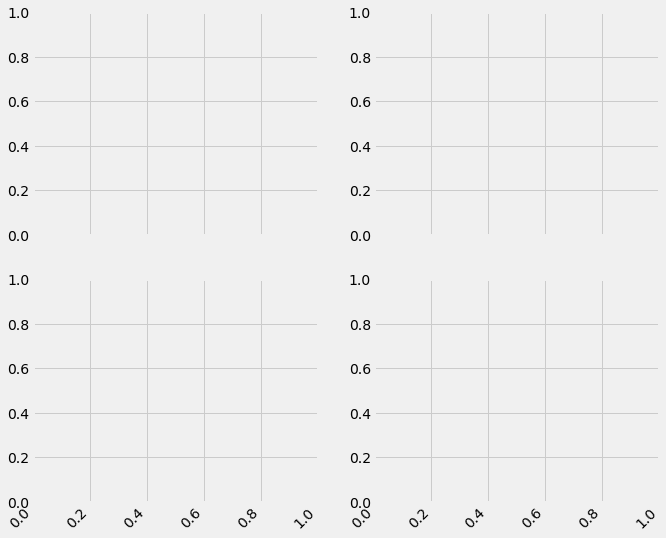

In [33]:
# 准备画图
# 指定默认风格
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 我的逗逼朋友
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)


In [32]:
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,41,0,0,0,0,0,1,0


In [31]:
# 标签
labels = np.array(features['actual'])
# 在特征中去掉标签
features = features.drop('actual', axis = 1)
# 名字去掉单独保存一下
features_list = list(features.columns)

#转换成合适的格式
features = np.array(features)

KeyError: 'actual'

In [30]:
features.shape

(348, 14)

In [29]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [14]:
input_features[0]

NameError: name 'input_features' is not defined

#### 构建网络模型

In [ ]:
x = torch.tensor(input_features, dtype = float)
y = torch.tensor(labels, dtype = float)

# 权重参数初始化
weights = torch.randn((14, 128), dtype = float, requires_grad = True)
biases = torch.randn(128, dtype = float, requires_grad = True)
weights2 = torch.randn((128, 1), dtype = float, requires_grad = True)
biases2 = torch.randn(1, dtype = float, requires_grad = True)

learning_rate = 0.001
losses = []

for i in range(1000):
    # 计算隐层
    hidden = x.mm(weights) + biases
    # 加入激活函数
    predictions = hidden.mm(weights2) + biases2
    # 通过计算损失
    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())

    # 打印损失值
    if i % 100 == 0:
        print('loss', loss)
    # 反向传播计算
    loss.backward()

    # 更新参数
